# Predicting customer churn in a “like-for-like” hotel chain

### Project Description

The customer of this research is a hotel chain “As a guest”.

To attract customers, this hotel chain added to its website the possibility to book a room without prepayment. However, if the customer canceled the reservation, the company suffered losses. The hotel staff could, for example, purchase groceries for the guest's arrival or simply not have time to find another customer.

To solve this problem, you need to develop a system that predicts the abandonment of a reservation. If the model shows that the reservation will be canceled, the customer is asked to pay a deposit. The deposit amount is 80% of the room rate for one night and one-time cleaning costs. The money will be debited from the client's account if he/she does cancel the reservation.

### Business metrics and other data

The main business metric for any hotel chain is its profit. A hotel's profit is the difference between the cost of a room for all nights and the cost of service: both in preparing the room and in accommodating the guest.
There are several types of rooms in a hotel. Depending on the type of room, a cost per night is assigned. There are also cleaning costs. If the client has rented the room for a long time, then the room is cleaned every two days.

**Hotel room rates:**

* Category A: per night - 1,000, one-time service - 400;
* Category B: per night - 800, single service - 350;
* Category C: per night - 600, single service - 350;
* category D: per night - 550, single service - 150;
* category E: per night - 500, single service - 150;
* category F: per night - 450, single service - 150;
* category G: per night - 350, single service - 150.

The hotel's pricing policy uses seasonal coefficients: in spring and fall prices increase by 20%, in summer - by 40%.

Losses of the hotel in case of canceling a room reservation are the cost of one cleaning and one night taking into account the seasonal coefficient.

The budget for the development of the forecasting system is 400 000. It should be taken into account that the implementation of the model should pay off during the test period. The development costs should be less than the revenue that the system will bring to the company.

#### Instructions

**Step 1.** Open the data files

File paths:
* /hotel_train.csv - data for training the model.
* /datasets/hotel_test.csv - data for testing the model.

**Step 2.** Data preprocessing and exploratory analysis

* Check the data and correct it if necessary.
* Conduct an exploratory analysis of the data presented. Describe the features found: outliers, outliers.

**Step 3.** Calculate business metrics

** Estimate the hotel's profit without implementing deposits.

**Step 4.** Develop an ML model
* Train different models and evaluate their quality. Select the best model and validate it on a test sample. 
* Describe the findings.
* Select a metric for training.
* * Estimate the profit that the selected model will make in a year (on the test dataset). 

**Step 5.** Identify the signs of an “unreliable” customer.
** Based on exploratory data analysis, describe a customer who is prone to cancel a reservation.

**Step 6.** Write an overall conclusion
* Describe the model that solves the problem with the greatest benefit to the business. Give the business recommendations based on the findings.

### Data Description

The hotel_train and hotel_test tables contain the same columns:

* id - record number
* adults - number of adult guests
* arrival_date_year - year of arrival
* arrival_date_month - month of arrival
* arrival_date_week_number - week of arrival
* arrival_date_day_of_month - day of arrival
* babies - number of babies
* booking_changes - number of changes of booking parameters
* children - number of children from 3 to 14 years old
* country - nationality of the guest
* 

 
* **customer_type:**
* *- Contract - a contract with a legal entity*
* *- Group - Group check-in*
* *- Transient - not associated with a contract or group run*
* *- Transient-party - not associated with a contract or group check-in, but associated with a Transient type reservation*
* 
* days_in_waiting_list - how many days the order has been waiting for confirmation
* distribution_channel
* is_canceled — order cancellation
* is_repeated_guest — an indication that the guest is making a second reservation
* lead_time — the number of days between the date of booking and the date of arrival
* 
* **meal - order options**:
* *- SC — no optional extras*
* *- BB — breakfast included*
* *- HB — breakfast and lunch included*
* *- FB — breakfast, lunch and dinner included*
* 
* previous_bookings_not_canceled - number of confirmed orders at the customer
* previous_cancellations - number of canceled bookings at the customer
* required_car_parking_spaces - need for car parking space
* reserved_room_type - type of reserved room
* stays_in_weekend_nights - number of weekend nights
* stays_in_week_nights - number of nights on weekdays
* total_nights - total number of nights
* total_of_special_requests - number of special stays

# Read data files

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


In [2]:
#Reading files
data_train = pd.read_csv('hotel_train.csv')
data_test = pd.read_csv('hotel_test.csv')

# Pre-processing and preliminary exploratory analysis of data

In [3]:
data_train.info()

#Code to display parts of tables (for visual inspection, as all columns do not fit on the screen)
# Remove # to display each part in turn.

#Pat1 
# data_train.loc[:,:'children'].head()
#Pat22 
# data_train.loc[:,'babies':'days_in_waiting_list'].head()
#Part3
# data_train.loc[:,'customer_type':].head()

#Code to display unique column values.
# Remove # to display each part in turn. 

# data_train['country'].unique()
# data_train['distribution_channel'].unique()
# data_train['customer_type'].unique()
# data_train['reserved_room_type'].unique()
# data_train['meal'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [4]:
#Replacing float values with integer values

data_train['lead_time'] = data_train['lead_time'].astype(int)
data_train['adults'] = data_train['adults'].astype(int)
data_train['children'] = data_train['children'].astype(int)
data_train['babies'] = data_train['babies'].astype(int)


In [5]:
#Dict for digitizing string values of month names
months = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

#Replacing string values of months with the number of the corresponding month. 
data_train['arrival_date_month'] = data_train['arrival_date_month'].replace(months)

In [6]:
#Digitize the values in the “Country” column using the Frequency Encoding method:

#Frequency of occurrence of each country in the training dataset.

country_freq = data_train['country'].value_counts() / len(data_train)
data_train['country_freq_encoded'] = data_train['country'].map(country_freq)

#Remove so much 'country' from the training dataset. 

data_train.drop('country', axis=1, inplace=True)

In [7]:
# Apply One-Hot Encoding to the 'distribution_channel' column
ohe_channels = pd.get_dummies(data_train['distribution_channel'], prefix='channel')

# Merge OHE dataframe with original dataframe. 

data_train = pd.concat([data_train, ohe_channels], axis=1)

# Deleting the 'distribution_channel' column 
data_train.drop('distribution_channel', axis=1, inplace=True)


In [8]:
#Applying OHE to the 'customer_type' column

ohe_types_clients = pd.get_dummies(data_train['customer_type'], prefix='client_type') 

#Merge OHE dataframe with original dataframe. 

data_train = pd.concat([data_train, ohe_types_clients], axis=1)

#Deleting the'customer_type' column 
data_train.drop('customer_type', axis=1, inplace=True)

In [9]:
#Delete extra spaces in the designation of the type of room booked. 

data_train['reserved_room_type'] = data_train['reserved_room_type'].str.strip()
# data_train.reserved_room_type.unique()

#Remove extra spaces in the designation of additional services. 

data_train['meal'] = data_train['meal'].str.strip()
# data_train.meal.unique()

In [10]:
#Applying OHE to the 'meal' column

ohe_meal = pd.get_dummies(data_train['meal'], prefix='meal') 

#Merge OHE dataframe with original dataframe 

data_train = pd.concat([data_train, ohe_meal], axis=1)

#Deleting the 'meal' column
data_train.drop('meal', axis=1, inplace=True)

In [11]:
#Create a dataset with basic pricing. 

price_data = pd.DataFrame(
    columns = ['room_type', 'price_per_night', 'cleaning'], 
    data = [
        ['A', 1000, 400],
        ['B', 800, 350],
        ['C', 600, 350],
        ['D', 550, 150],
        ['E', 500, 150],
        ['F', 450, 150],
        ['G', 350, 150]
    ]
)


#Function to add a stotz with a base price per room.  

def add_base_price(room_type):
    return price_data.loc[price_data['room_type'] == room_type, 'price_per_night'].values[0]

#Add a column with the base price per room. 
data_train['price'] = data_train['reserved_room_type'].apply(add_base_price)

In [12]:
data_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,channel_TA/TO,client_type_Contract,client_type_Group,client_type_Transient,client_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,price
0,0,0,7,2015,7,27,1,0,1,1,...,False,False,False,True,False,True,False,False,False,1000
1,1,0,14,2015,7,27,1,0,2,2,...,True,False,False,True,False,True,False,False,False,1000
2,2,0,0,2015,7,27,1,0,2,2,...,False,False,False,True,False,True,False,False,False,600
3,3,0,9,2015,7,27,1,0,2,2,...,False,False,False,True,False,False,True,False,False,600
4,4,1,85,2015,7,27,1,0,3,2,...,True,False,False,True,False,True,False,False,False,1000


In [13]:
#Function to apply seasonal cost increase factors


def full_price(data):
    if data['arrival_date_month'] in (3,4,5):
        return data['price'] * 1.2 * data['total_nights'] 
    
    elif data['arrival_date_month'] in (6,7,8):
        return data['price'] * 1.4 * data['total_nights'] 
    
    else:
        return data['price'] * data['total_nights'] 

#Apply the function line by line

data_train['price'] = data_train.apply(full_price, axis=1)

In [14]:
#Function to add a base price for room cleaning

def price_for_cleaning(room_type):
    return price_data.loc[price_data['room_type'] == room_type, 'cleaning'].values[0]

#Add a column to the training dataset
data_train['cleaning'] = data_train['reserved_room_type'].apply(price_for_cleaning)


In [15]:
#Additional cleaning function for long stays in the hotel (every two days - new cleaning)

def add_cleaning(data):
    return data['cleaning'] * (1 + data['total_nights'] // 2)

#Application to a training dataset 
data_train['cleaning'] = data_train.apply(add_cleaning, axis=1)

In [16]:
#Add a column with the total cost
data_train['total_price'] = data_train['price'] + data_train['cleaning']

#Remove the 'price_per_night' and 'cleaning' columns. Since there is a column with the total price. And also the type of room booked, because 
#this information is embedded in the final price

data_train.drop(columns=['price', 'cleaning', 'reserved_room_type'], inplace=True)



In [17]:
#Final view of data types

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  int32  
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  int64  
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  int32  
 10  children                        65229 non-null  int32  
 11  babies                          65229 non-null  int32  
 12  is_repeated_guest               

### Now let's do the same with the dataset intended for the model test. 

In [18]:
#Replacing float values with integer values

data_test['lead_time'] = data_test['lead_time'].astype(int)
data_test['adults'] = data_test['adults'].astype(int)
data_test['children'] = data_test['children'].astype(int)
data_test['babies'] = data_test['babies'].astype(int)


#Replacing string values of months with the number of the corresponding month
data_test['arrival_date_month'] = data_test['arrival_date_month'].replace(months)

#Digitize the values in the “Country” column using the Frequency Encoding method:

#If there are countries in the test dataset that are not in the training dataset, their frequency will be 0
data_test['country_freq_encoded'] = data_test['country'].map(country_freq).fillna(0)

#Remove so much 'country' from the training dataset

data_test.drop('country', axis=1, inplace=True)

#Apply One-Hot Encoding to the 'distribution_channel' column
ohe_channels = pd.get_dummies(data_test['distribution_channel'], prefix='channel')

#Merge OHE dataframe with original dataframe 

data_test = pd.concat([data_test, ohe_channels], axis=1)

#Deleting the 'distribution_channel' column
data_test.drop('distribution_channel', axis=1, inplace=True)

#Delete extra spaces in the designation of the type of room booked

data_test['reserved_room_type'] = data_test['reserved_room_type'].str.strip()

#Remove extra spaces in the designation of additional services 

data_test['meal'] = data_test['meal'].str.strip()

#Applying OHE to the 'customer_type' column

ohe_types_clients = pd.get_dummies(data_test['customer_type'], prefix='client_type') 

# Merge OHE dataframe with original dataframe 

data_test = pd.concat([data_test, ohe_types_clients], axis=1)

# Deleting the 'customer_type' column  
data_test.drop('customer_type', axis=1, inplace=True)

#Applying OHE to the 'meal' column

ohe_meal = pd.get_dummies(data_test['meal'], prefix='meal') 

# Merge OHE dataframe with original dataframe 

data_test = pd.concat([data_test, ohe_meal], axis=1)

# Deleting the 'meal' column 
data_test.drop('meal', axis=1, inplace=True)

#Add a column with the base price per room
data_test['price'] = data_test['reserved_room_type'].apply(add_base_price)

#Apply the function to calculate the total price for the accommodation
data_test['price'] = data_test.apply(full_price, axis=1)

#Add a column to the training dataset
data_test['cleaning'] = data_test['reserved_room_type'].apply(price_for_cleaning)

#Inclusion of additional cleanings in the test dataset
data_test['cleaning'] = data_test.apply(add_cleaning, axis=1)

#Add a column with the total cost
data_test['total_price'] = data_test['price'] + data_test['cleaning']

#Remove the 'price_per_night' and 'cleaning' columns. Since there is a column with the total price. And also the type of room booked, because 
#this information is embedded in the final price

data_test.drop(columns=['price', 'cleaning', 'reserved_room_type'], inplace=True)


In [19]:
#Final check 
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  int32  
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  int64  
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  int32  
 10  children                        32412 non-null  int32  
 11  babies                          32412 non-null  int32  
 12  is_repeated_guest               

In [20]:
# Checking if the column order matches
train_columns = data_train.columns.tolist()
test_columns = data_test.columns.tolist()

# Checking for a match
train_columns == test_columns

True

### Просмотр первых и последних строк данных:
* Стандартные методы h### View first and last lines of data:
* Standard head() and tail() methods will help you quickly get an idea of how the data looks like after all transformationsead() и tail() помогут быстро получить представление о том, как выглядят данные после всех преобразований

In [21]:
data_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,channel_TA/TO,client_type_Contract,client_type_Group,client_type_Transient,client_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,total_price
0,0,0,7,2015,7,27,1,0,1,1,...,False,False,False,True,False,True,False,False,False,1800.0
1,1,0,14,2015,7,27,1,0,2,2,...,True,False,False,True,False,True,False,False,False,3600.0
2,2,0,0,2015,7,27,1,0,2,2,...,False,False,False,True,False,True,False,False,False,2380.0
3,3,0,9,2015,7,27,1,0,2,2,...,False,False,False,True,False,False,True,False,False,2380.0
4,4,1,85,2015,7,27,1,0,3,2,...,True,False,False,True,False,True,False,False,False,5000.0


In [22]:
data_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,channel_TA/TO,client_type_Contract,client_type_Group,client_type_Transient,client_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,total_price
0,6086,1,74,2017,1,1,1,1,0,2,...,True,False,False,True,False,True,False,False,False,1400.0
1,6087,1,62,2017,1,1,1,2,2,2,...,True,False,False,True,False,True,False,False,False,5200.0
2,6088,1,62,2017,1,1,1,2,2,2,...,True,False,False,True,False,True,False,False,False,5200.0
3,6089,1,71,2017,1,1,1,2,2,1,...,True,False,False,True,False,True,False,False,False,5200.0
4,6090,1,172,2017,1,1,1,2,5,2,...,True,False,False,True,False,True,False,False,False,8600.0


In [23]:
data_train.tail()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,channel_TA/TO,client_type_Contract,client_type_Group,client_type_Transient,client_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,total_price
65224,84057,0,23,2016,12,53,30,2,4,2,...,True,False,False,True,False,True,False,False,False,3900.0
65225,84063,0,53,2016,12,53,31,2,3,2,...,True,False,False,True,False,False,False,True,False,3200.0
65226,84094,0,7,2016,12,53,31,2,4,2,...,True,False,False,True,False,True,False,False,False,3900.0
65227,84117,0,17,2016,12,53,30,2,5,2,...,True,False,False,True,False,False,False,False,True,8600.0
65228,84121,0,107,2016,12,53,31,2,5,2,...,True,False,False,True,False,True,False,False,False,8600.0


In [24]:
data_test.tail()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,channel_TA/TO,client_type_Contract,client_type_Group,client_type_Transient,client_type_Transient-Party,meal_BB,meal_FB,meal_HB,meal_SC,total_price
32407,97899,0,164,2017,8,35,31,2,4,2,...,True,False,False,True,False,True,False,False,False,10000.0
32408,97900,0,21,2017,8,35,30,2,5,2,...,True,False,False,True,False,True,False,False,False,11400.0
32409,97901,0,23,2017,8,35,30,2,5,2,...,True,False,False,True,False,True,False,False,False,11400.0
32410,97902,0,34,2017,8,35,31,2,5,2,...,True,False,False,True,False,True,False,False,False,5990.0
32411,97903,0,109,2017,8,35,31,2,5,2,...,True,False,False,True,False,True,False,False,False,11400.0


### Checking the dimensionality of datasets

In [25]:
data_train.shape

(65229, 34)

In [26]:
data_test.shape

(32412, 34)

### Checking data statistics:

In [27]:
data_train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,country_freq_encoded,total_price
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,...,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,7.450367,31.339772,15.847813,0.825185,2.224793,1.836576,...,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978,0.222760,3842.016128
std,25614.858971,0.482431,96.127545,0.449481,3.099168,13.464024,8.748182,0.853477,1.354992,0.480245,...,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108,0.196711,2250.550305
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000015,500.000000
25%,19108.000000,0.000000,17.000000,2015.000000,5.000000,21.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.035674,2190.000000
50%,40554.000000,0.000000,64.000000,2016.000000,8.000000,34.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.091585,3600.000000
75%,67414.000000,1.000000,151.000000,2016.000000,10.000000,42.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.441997,5000.000000
max,84121.000000,1.000000,374.000000,2016.000000,12.000000,53.000000,31.000000,4.000000,6.000000,4.000000,...,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000,0.441997,16400.000000


### Check the categorical data of the channels from which reservations have been received. 

In [28]:
data_train[['channel_Corporate', 'channel_Direct', 'channel_GDS', 'channel_TA/TO']].sum()

channel_Corporate     3823
channel_Direct        6853
channel_GDS             99
channel_TA/TO        54454
dtype: int64

In [29]:
data_test[['channel_Corporate', 'channel_Direct', 'channel_GDS', 'channel_TA/TO']].sum()

channel_Corporate     1602
channel_Direct        3642
channel_GDS             85
channel_TA/TO        27083
dtype: int64

### Checking for skips:

In [30]:
data_train.isnull().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
country_freq_encoded              0
channel_Corporate                 0
channel_Direct                    0
channel_GDS                       0
channel_TA/TO                     0
client_type_Contract              0
client_type_Group                 0
client_type_Transient       

In [31]:
data_test.isnull().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
country_freq_encoded              0
channel_Corporate                 0
channel_Direct                    0
channel_GDS                       0
channel_TA/TO                     0
client_type_Contract              0
client_type_Group                 0
client_type_Transient       

### Comparison of distributions between training and test datasets:

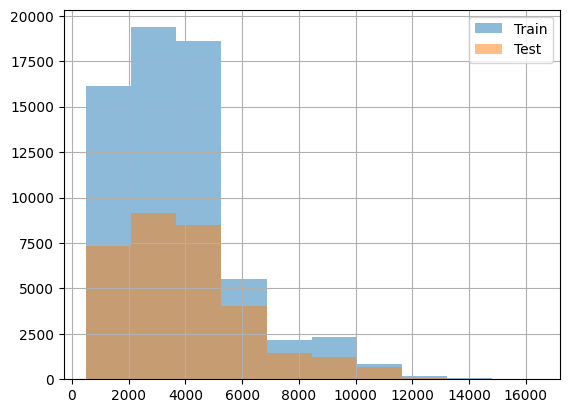

In [32]:
data_train['total_price'].hist(alpha=0.5, label='Train')
data_test['total_price'].hist(alpha=0.5, label='Test')
plt.legend()
plt.show()

### Visual inspection of correlations:

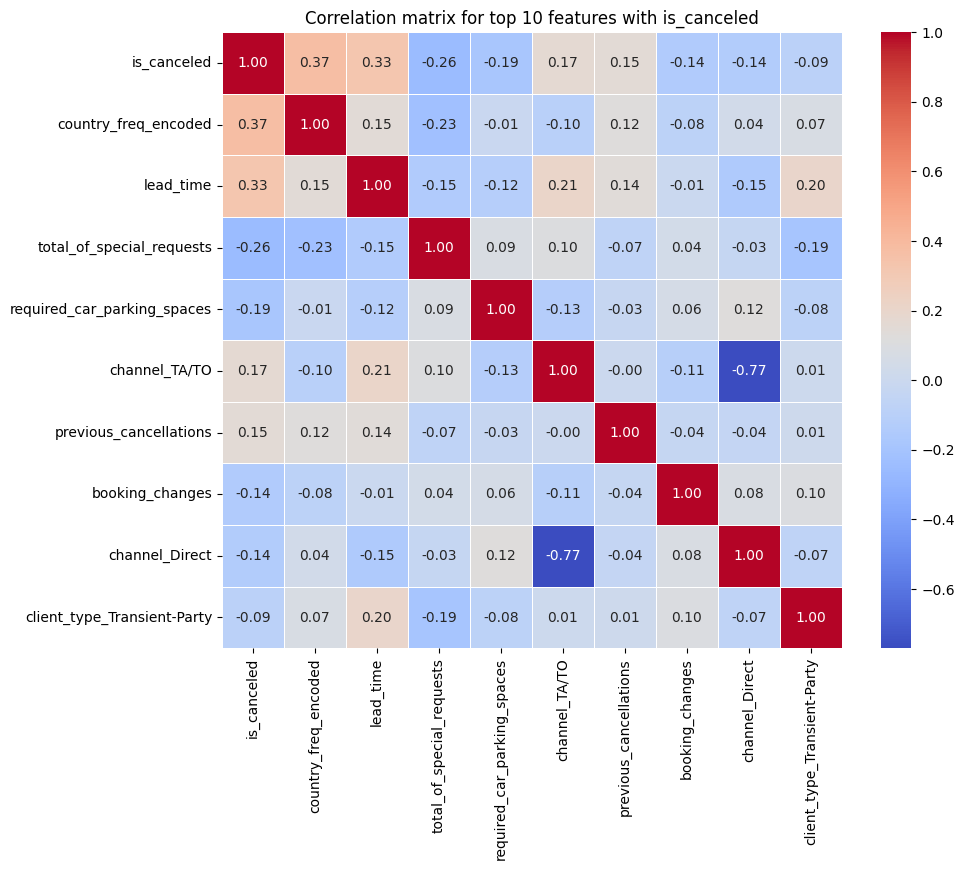

In [33]:
# Calculate the correlation matrix for all features excluding 'id'
correlation_matrix = data_train.drop(columns=['id']).corr()

# Select 10 features with the highest absolute correlation with 'is_canceled', excluding 'id'
top_10_features_is_canceled = correlation_matrix['is_canceled'].abs().sort_values(ascending=False).head(10).index

# Construct a correlation matrix for these attributes only
plt.figure(figsize=(10, 8))
sns.heatmap(data_train[top_10_features_is_canceled].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation matrix for top 10 features with is_canceled')
plt.show()


**High correlation with is_canceled:**

Traits with high absolute correlation with is_canceled can be important predictors for the model. These attributes may include variables such as:

* lead_time: Customers who book with more lead time are often more likely to cancel.
* previous_cancellations: It is logical to assume that customers who have previously canceled may cancel again.
* total_of_special_requests: A high number of requests may indicate that the customer is unstable, which can lead to cancelations.

### Selective string comparison:

In [34]:
data_train.iloc[0]

id                                       0
is_canceled                              0
lead_time                                7
arrival_date_year                     2015
arrival_date_month                       7
arrival_date_week_number                27
arrival_date_day_of_month                1
stays_in_weekend_nights                  0
stays_in_week_nights                     1
adults                                   1
children                                 0
babies                                   0
is_repeated_guest                        0
previous_cancellations                   0
previous_bookings_not_canceled           0
booking_changes                          0
days_in_waiting_list                     0
required_car_parking_spaces              0
total_of_special_requests                0
total_nights                             1
country_freq_encoded              0.078324
channel_Corporate                    False
channel_Direct                        True
channel_GDS

In [35]:
data_test.iloc[0]

id                                    6086
is_canceled                              1
lead_time                               74
arrival_date_year                     2017
arrival_date_month                       1
arrival_date_week_number                 1
arrival_date_day_of_month                1
stays_in_weekend_nights                  1
stays_in_week_nights                     0
adults                                   2
children                                 0
babies                                   0
is_repeated_guest                        0
previous_cancellations                   0
previous_bookings_not_canceled           0
booking_changes                          0
days_in_waiting_list                     0
required_car_parking_spaces              0
total_of_special_requests                0
total_nights                             1
country_freq_encoded              0.441997
channel_Corporate                    False
channel_Direct                       False
channel_GDS

# Formulation of an ML-task based on a business problem

### 1. Defining the business objective:
- **Main business objective:** Minimize losses from cancelled reservations and increase the hotel's profits.
- **Specific objective:** Create a model that predicts the likelihood of cancellations so that the hotel can take steps to reduce such cancellations and therefore minimize losses.

### 2. ML Problem Formulation:
- **Task Type:** Binary Classification.
- **Target variable:** `is_canceled` (1 - reservation canceled, 0 - reservation held).
- **Model:** Logistic regression to predict the probability of a reservation being canceled.

### 3. Target Metric:
- **Core Metric:** ROC-AUC, F1-Score.
- **Business metric:** Hotel profit associated with reduced loss of canceled bookings. You can also use the metric of expected hotel profit given the model's predictions.

### 4. Budget and Payback:
- **Costs:** The budget for the development of the forecasting system is 400,000 rubles.
- **Payback:** The model should bring more profit than the cost of its development and implementation. This means that the reduction in losses due to the model's predictions should be greater than 400,000 rubles for the test period.

### 5. Hypotheses and Assumptions:
- **Hypothesis 1:** Using the model to predict reservation cancellations will reduce the number of cancellations and therefore the hotel's losses.
- **Hypothesis 2:** The model will help the hotel to decide on additional measures (e.g., require prepayment) for reservations with a high probability of cancellation.

### 6. Problem formulation:
- **Objective:** To build a model that will predict the probability of a reservation being canceled based on available data (attributes such as room type, seasonal factors, customer country, etc.).
- **Objectives:**
  1- Training the logistic regression model on historical data.
  2. Optimizing the model by considering the ROC-AUC or F1-Score metric.
  3. Calculate the economic effect of implementing the model to estimate its payback.

### 7. Link to business metrics:
- **Cancellation Losses:** If a hotel cancels a reservation, the hotel loses the cost of one cleaning and one night's stay with a seasonal factor.
- **Expected Profit:** The model is expected to reduce the number of cancellations and, consequently, losses by an amount exceeding 400,000 rubles.

## Conclusion:
At this stage, the task is clearly linked to business metrics, and the next steps will be to train the model, assess its accuracy, and calculate the economic effect of model implementation. If the model demonstrates the potential to reduce losses by more than 400,000 rubles, its implementation will be justified.

# Developing an ML model

In [36]:
#data_train.info()

#Let's highlight the signs 

features = data_train.drop(columns = ['id', 'is_canceled', 'arrival_date_year'])

#Target attribute

target = data_train['is_canceled']                        

In [37]:
#Initialize StandardScaler
scaler = StandardScaler()

#Apply scaling to the features
features_scaled = scaler.fit_transform(features)

#Convert back to DataFrame for ease of use
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

In [38]:
#Target ratio (imbalance check)
target.value_counts(normalize=True)

is_canceled
0    0.631391
1    0.368609
Name: proportion, dtype: float64

There is no need to artificially increase the class ratio since there is no strong imbalance. The logistic regression model can work with such a class ratio.

In [39]:
#We can move on to dividing the date sets and training the model! 

#Divide samples into training and validation samples. 

features_train, features_valid, target_train, target_valid = train_test_split(features_scaled, target, test_size=0.25, random_state=12345)

#Creating a model 
model = LogisticRegression(random_state=12345, class_weight='balanced')

#Model training 
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345)

In [40]:
#Get the predictions on the validation sample
predictions_valid = model.predict(features_valid)

In [41]:
#accuracy
accuracy = accuracy_score(target_valid, predictions_valid)

#F1-score
f1 = f1_score(target_valid, predictions_valid)

#Precision
precision = precision_score(target_valid, predictions_valid)

#Recall
recall = recall_score(target_valid, predictions_valid)

#ROC-AUC
probs = model.predict_proba(features_valid)[:, 1]  # Obtaining probabilities for class 1
roc_auc = roc_auc_score(target_valid, probs)

#Results output
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

#More information about the quality of the model
print(classification_report(target_valid, predictions_valid))

Accuracy: 0.7754476330635272
Precision: 0.6880548201214765
Recall: 0.72700345565246
F1-Score: 0.7069931188990238
ROC-AUC: 0.8583821184963367
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     10231
           1       0.69      0.73      0.71      6077

    accuracy                           0.78     16308
   macro avg       0.76      0.77      0.76     16308
weighted avg       0.78      0.78      0.78     16308



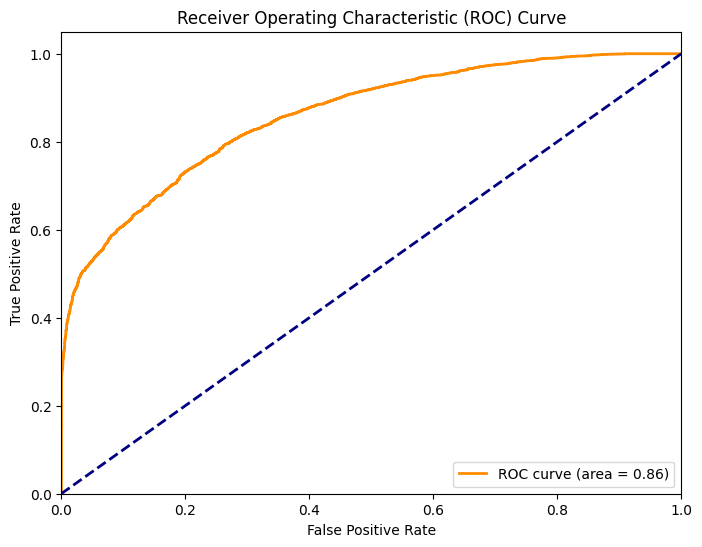

In [42]:
#Obtain probabilities for class 1 (cancel reservation)
probs = model.predict_proba(features_valid)[:, 1]

#ROC curve construction
fpr, tpr, thresholds = roc_curve(target_valid, probs)
roc_auc = auc(fpr, tpr)

#ROC curve visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The AUC value = 0.86 is a very good result. This indicates that the model distinguishes well between canceled and uncanceled reservations.

**Interpretation of AUC = 0.86:**

* Ability to distinguish between classes: A model with AUC = 0.86 means that it will correctly distinguish between a randomly selected pair of positive and negative examples (where the positive example is a canceled reservation) with 86% probability.
* Good performance: an AUC above 0.8 usually indicates that the model performs well on the classification task, even if the classes are not perfectly balanced.

But, a value of `Recall = 0.737` (about 74%) may seem insufficient since it is critical for business to recognize as many cancelled bookings as possible. This means that the model misses about 26% of all real cancelations, which may be a significant omission in the context of the task.

**Possible steps to improve Recall:**

* Lowering the classification threshold:

By default, the model uses a threshold of 0.5 to make a decision. We can try to lower this threshold to increase Recall.
For example, we can set the threshold to 0.4 or lower and see how this affects Recall.

In [43]:
#Obtain probabilities for class 1 (cancel reservation)
probs = model.predict_proba(features_valid)[:, 1]

#Initialize variables to store the best result
best_threshold = 0.6
best_f1 = 0
best_recall = 0
best_precision = 0

#Thresholds from 0.55 to 0.3 in increments of 0.01
for threshold in np.arange(0.6, 0.2, -0.01):
    predictions = (probs >= threshold).astype(int)
    
    # Calculating metrics
    current_recall = recall_score(target_valid, predictions)
    current_precision = precision_score(target_valid, predictions)
    current_f1 = f1_score(target_valid, predictions)
    
    # F1-Score comparison and saving the best threshold
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold
        best_recall = current_recall
        best_precision = current_precision


#Вывод лучшего порога и соответствующих метрик
print(f"Best Threshold: {best_threshold}")
print(f"Recall is at a better threshold: {best_recall}")
print(f"Precision is at his best threshold: {best_precision}")
print(f"F1-Score is at its best threshold: {best_f1}")

predictions = (probs >= best_threshold).astype(int)

Best Threshold: 0.43999999999999984
Recall is at a better threshold: 0.7990784926773079
Precision is at his best threshold: 0.6358517742569072
F1-Score is at its best threshold: 0.7081814204462593


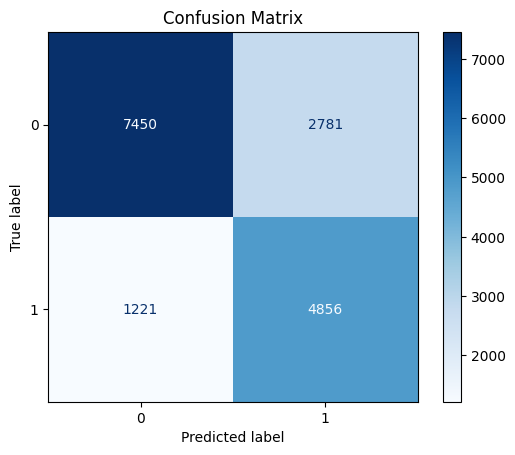

In [44]:
#Get the error matrix
cm = confusion_matrix(target_valid, predictions)

#Visualization of the error matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Error Matrix Interpretation:

* **True Negatives (TN): 7450**

The model correctly predicted 7450 instances where the reservation was not canceled (class 0).

* **False Positives (FP): 2181**

The model incorrectly predicted 2181 instances where a reservation was predicted to be canceled (class 1) but was not actually canceled (class 0).

* **False Negatives (FN): 1221**

The model failed to predict 1221 instances where a reservation was canceled (class 1), but the model predicted that it would not be canceled (class 0).

* **True Positives (TP): 4856** 

The model correctly predicted 4856 instances where the reservation was canceled (class 1).

### Metrics:
* Best Threshold: 0.44

* Recall: 0.80 (about 79.99%)

The model correctly identifies 79.9% of all reservation cancelations.

* Precision: 0.64 (about 63.58%)

* Of all predicted cancelations, 63.58% were correct.

* F1-Score: 0.71 (about 70.82%).

This is a balanced metric that takes into account both Recall and Precision.

### Conclusions:
* Good balance between Recall and Precision:

* Metrics show that the model found a reasonable trade-off between cancel detection (Recall) and prediction accuracy (Precision).

Recall on the test set: 0.7163847192439043
Precision on the test set: 0.6415362731152204
F1-Score on the test set: 0.6768976773854639


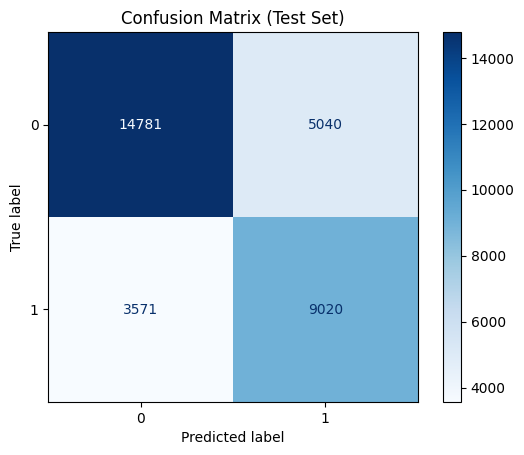

In [45]:
#Let's go to the test sample

#Applying scaling to the test dataset
features_test_scaled = scaler.transform(data_test.drop(columns=['id', 'is_canceled','arrival_date_year']))

#Convert back to a DataFrame with the same column names
features_test_scaled = pd.DataFrame(features_test_scaled, columns=features_train.columns)

#Obtain probabilities for class 1 on a test dataset
probs_test = model.predict_proba(features_test_scaled)[:, 1]

#Applying custom threshold 0.44
predictions_test_custom_threshold = (probs_test >= 0.44).astype(int)

#Evaluating metrics on a test set
recall_test = recall_score(data_test['is_canceled'], predictions_test_custom_threshold)
precision_test = precision_score(data_test['is_canceled'], predictions_test_custom_threshold)
f1_test = f1_score(data_test['is_canceled'], predictions_test_custom_threshold)

#Metrics output
print(f"Recall on the test set: {recall_test}")
print(f"Precision on the test set: {precision_test}")
print(f"F1-Score on the test set: {f1_test}")

#Build an error matrix for the test set
cm_test = confusion_matrix(data_test['is_canceled'], predictions_test_custom_threshold)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.show()


# Let's try to apply the random forest model

In [46]:
#Creating a model
rf_model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth = 12, min_samples_leaf = 4, n_estimators = 75)

#Model training 
rf_model.fit(features_train, target_train)

#Get the predictions on the validation sample 

predictions_valid_rf = rf_model.predict(features_valid)

In [47]:
# Estimation of metrics for random forest on validation sample
recall_rf = recall_score(target_valid, predictions_valid_rf)
precision_rf = precision_score(target_valid, predictions_valid_rf)
f1_rf = f1_score(target_valid, predictions_valid_rf)

# Metrics output
print(f"Recall (Random Forest): {recall_rf}")
print(f"Precision (Random Forest): {precision_rf}")
print(f"F1-Score (Random Forest): {f1_rf}")

Recall (Random Forest): 0.804179693927925
Precision (Random Forest): 0.7945049585433263
F1-Score (Random Forest): 0.7993130520117763


In [48]:
#Testing on a test sample

predictions_test_rf = rf_model.predict(features_test_scaled)

#Estimation of metrics on a test sample

recall_test_rf = recall_score(data_test['is_canceled'], predictions_test_rf)
precision_test_rf = precision_score(data_test['is_canceled'],predictions_test_rf)
f1_test_rf = f1_score(data_test['is_canceled'], predictions_test_rf)

#Metrics output
print(f"Recall (test df): {recall_test_rf}")
print(f"Precision (test df): {precision_test_rf}")
print(f"F1-Score (test df): {f1_test_rf}")


Recall (test df): 0.6153601779048526
Precision (test df): 0.7353136566385119
F1-Score (test df): 0.6700103770321688


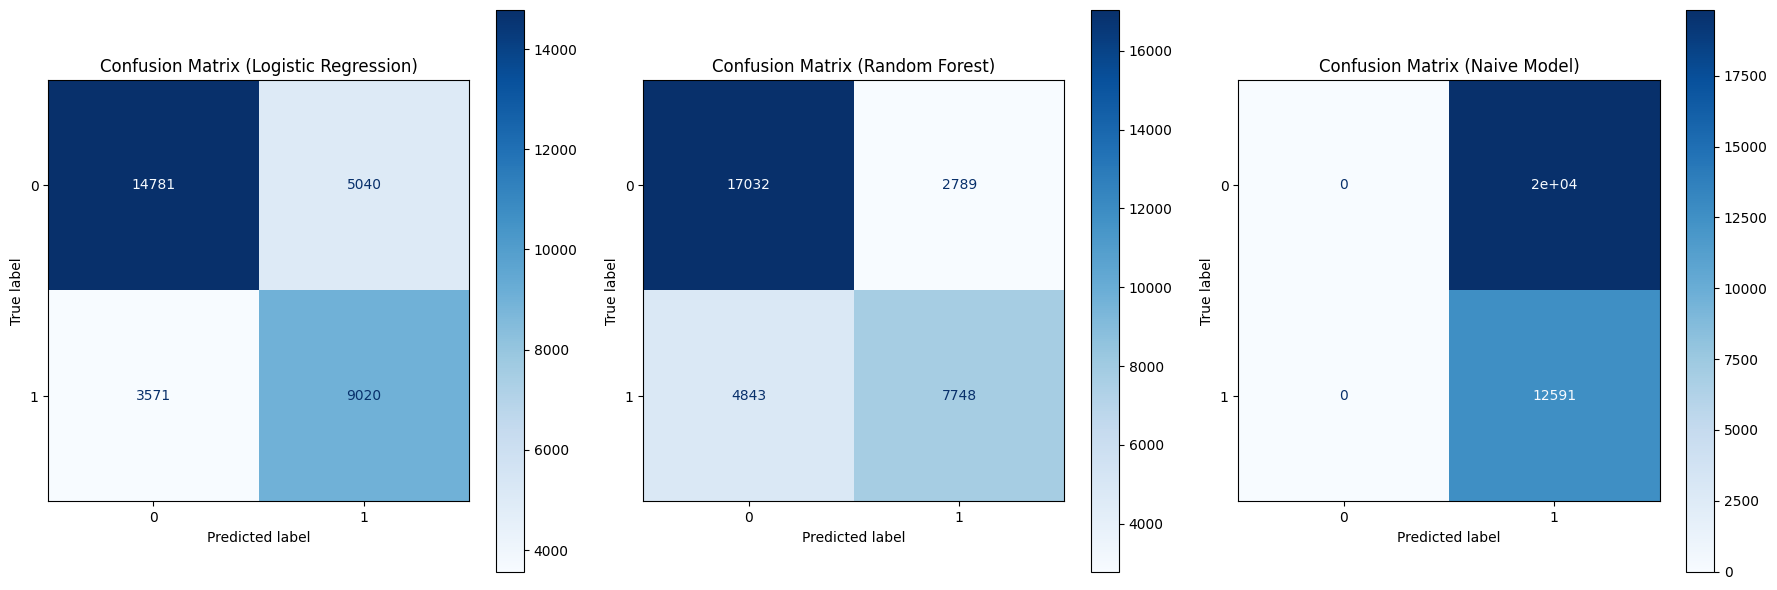

In [49]:
#“Naive” model: always predicts 1 (always cancel)
predictions_naive = np.ones_like(data_test['is_canceled'])

#Error matrices for each model
cm_test = confusion_matrix(data_test['is_canceled'], predictions_test_custom_threshold)  #Logistic regression
cm_rf_test = confusion_matrix(data_test['is_canceled'], predictions_test_rf)   #Random forest
cm_naive = confusion_matrix(data_test['is_canceled'], predictions_naive)  #Naive model

#Customize the shape for three charts side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 ряд, 3 столбца, размер фигуры

#Logistic regression
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp_test.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title("Confusion Matrix (Logistic Regression)")

#Random forest
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test, display_labels=model.classes_)
disp_rf_test.plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title("Confusion Matrix (Random Forest)")

#Naive model
disp_naive = ConfusionMatrixDisplay(confusion_matrix=cm_naive, display_labels=model.classes_)
disp_naive.plot(cmap=plt.cm.Blues, ax=ax[2])
ax[2].set_title("Confusion Matrix (Naive Model)")

plt.tight_layout()  #Automatic adjustment of distances between graphs
plt.show()


In [50]:
#Metrics for random forest
metrics_rf = {
    'Model': 'Random Forest',
    'Recall (Validation)': recall_rf,
    'Precision (Validation)': precision_rf,
    'F1-Score (Validation)': f1_rf,
    'Recall (Test)': recall_test_rf,
    'Precision (Test)': precision_test_rf,
    'F1-Score (Test)': f1_test_rf
}

#Metrics for logistic regression
metrics_lr = {
    'Model': 'Logistic Regression',
    'Recall (Validation)': best_recall,
    'Precision (Validation)': best_precision,
    'F1-Score (Validation)': best_f1,
    'Recall (Test)': recall_test,
    'Precision (Test)': precision_test,
    'F1-Score (Test)': f1_test
}

#Merge the metrics into a list
metrics_data = [metrics_rf, metrics_lr]

#Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Adding columns with averages
metrics_df['Avg Recall'] = metrics_df[['Recall (Validation)', 'Recall (Test)']].mean(axis=1)
metrics_df['Avg Precision'] = metrics_df[['Precision (Validation)', 'Precision (Test)']].mean(axis=1)
metrics_df['Avg F1-Score'] = metrics_df[['F1-Score (Validation)', 'F1-Score (Test)']].mean(axis=1)

# Table output
metrics_df

,Model,Recall (Validation),Precision (Validation),F1-Score (Validation),Recall (Test),Precision (Test),F1-Score (Test),Avg Recall,Avg Precision,Avg F1-Score
0,Random Forest,0.804180,0.794505,0.799313,0.615360,0.735314,0.670010,0.709770,0.764909,0.734662
1,Logistic Regression,0.799078,0.635852,0.708181,0.716385,0.641536,0.676898,0.757732,0.638694,0.692540


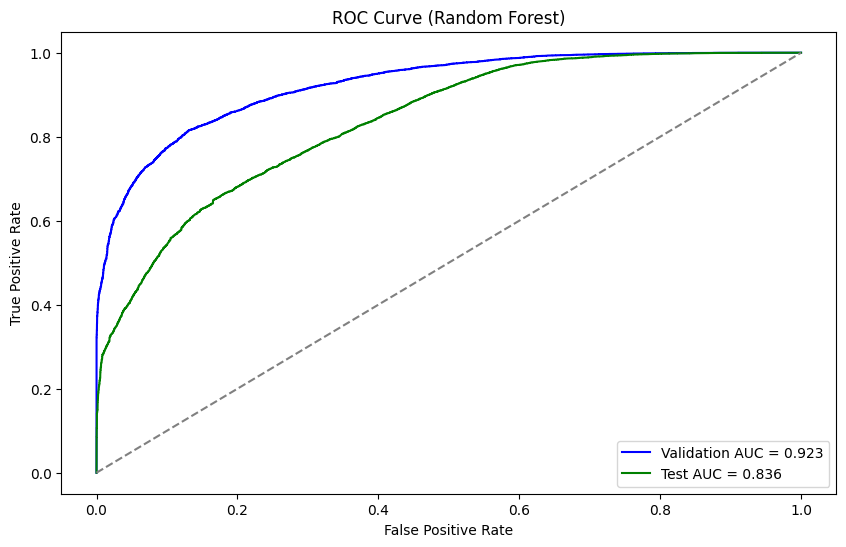

In [51]:
# Obtain probabilities for the validation sample (for class 1)
rf_probs_valid = rf_model.predict_proba(features_valid)[:, 1]
rf_probs_test = rf_model.predict_proba(features_test_scaled)[:, 1]

# ROC curve and AUC for the validation sample
fpr_valid, tpr_valid, _ = roc_curve(target_valid, rf_probs_valid)
auc_valid = roc_auc_score(target_valid, rf_probs_valid)

# ROC curve and AUC for test sample
fpr_test, tpr_test, _ = roc_curve(data_test['is_canceled'], rf_probs_test)
auc_test = roc_auc_score(data_test['is_canceled'], rf_probs_test)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))

# Validation sampling
plt.plot(fpr_valid, tpr_valid, color='blue', label=f'Validation AUC = {auc_valid:.3f}')
# Test sample
plt.plot(fpr_test, tpr_test, color='green', label=f'Test AUC = {auc_test:.3f}')

# A line at random
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Signatures
plt.title('ROC Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Graph display
plt.show()

## Argumentation for the selection of the random forest model

Based on the comparison of the random forest and logistic regression models based on the `Recall`, `Precision` and `F1-Score` metrics on both the validation and test samples, the following conclusions can be drawn:

| Model               | Recall (Validation) | Precision (Validation) | F1-Score (Validation) | Recall (Test) | Precision (Test) | F1-Score (Test) | Avg Recall | Avg Precision | Avg F1-Score |
|---------------------|---------------------|------------------------|-----------------------|---------------|------------------|-----------------|------------|---------------|--------------|
| Random Forest        | 0.804180            | 0.794505               | 0.799313              | 0.615360      | 0.735314         | 0.670010        | 0.709770   | 0.764909      | 0.734662     |
| Logistic Regression  | 0.799078            | 0.635852               | 0.708181              | 0.716385      | 0.641536         | 0.676898        | 0.757732   | 0.638694      | 0.692540     |

### Model Comparison

1. **Recall (Validation)**:
   - The Random Forest model performed better on the validation sample (0.804), indicating its ability to better identify reservation cancellations.
   - Logistic regression has a slightly lower Recall score (0.799), which is also not bad, but the random forest model is still better.

2. **Precision (Validation)**:
   - In terms of Precision on the validation sample, the random forest again outperforms the logistic regression: 0.795 vs. 0.636. This indicates that random forest is less prone to false positives, which is important for our business case.

3. **F1-Score (Validation)**:
   - The random forest model shows a significantly better F1-Score on the validation sample, 0.799 compared to 0.708 for logistic regression. This is an important figure as the F1-Score takes into account the balance between Precision and Recall.

4. **Test Metrics**:
   - In the test sample, Recall in the random forest model (0.615) is lower than that of logistic regression (0.716). However, Precision is significantly higher for the random forest (0.735), indicating a lower false positive rate.
   - Despite the slightly lower Recall on the test sample, the F1-Score of the random forest (0.670) is comparable to the logistic regression (0.677), making the models roughly equal on this measure on the test.

5. **Average Values of Metrics**:
   - In terms of average Recall, Precision, and F1-Score, random forest performs better on Precision (0.764 vs. 0.638) and F1-Score (0.734 vs. 0.692).
   - Despite the slight advantage of logistic regression on mean Recall, the mean F1-Score of the random forest is higher, making it a more balanced choice for this task.

### Conclusion

The **random forest** model is chosen as the primary model for predicting booking cancellations because it performs better on Precision and F1-Score metrics, which is especially important for minimizing false positives. Considering the business objective, where it is important not only to predict booking cancellations but also to minimize erroneous actions, random forest is a more appropriate model.

# Let's move on to the calculation of business indicators

In [52]:
#Prepare a dataset with potential hotel losses in case of late cancellation (one cleaning and cost per night)
data_test_original = pd.read_csv('hotel_test.csv')

#Leave only the necessary columns
data_test_losses = data_test_original.loc[:, ['is_canceled', 'reserved_room_type']]

#Remove the extra spaces in 'reserved_room_type'
data_test_losses['reserved_room_type'] = data_test_losses['reserved_room_type'].str.strip()

#Calculate the room rate per night
data_test_losses['room_per_night'] = data_test_losses['reserved_room_type'].apply(add_base_price)

#Calculate the cost of cleaning
data_test_losses['cleaning'] = data_test_losses['reserved_room_type'].apply(price_for_cleaning)

#Losses without deposit - full price per night and cleaning fee
data_test_losses['cost_of_loss_without_deposit'] = data_test_losses['room_per_night'] + data_test_losses['cleaning']

#Losses with deposit - 20% of the room rate per night
data_test_losses['cost_of_loss_with_deposit'] = data_test_losses['room_per_night'] * 0.2

#Delete unnecessary columns
data_test_losses.drop(columns=['reserved_room_type', 'room_per_night', 'cleaning'], inplace=True)

#Check the result
data_test_losses.head()

,is_canceled,cost_of_loss_without_deposit,cost_of_loss_with_deposit
0,1,1400,200.0
1,1,1400,200.0
2,1,1400,200.0
3,1,1400,200.0
4,1,1400,200.0


In [53]:
#Suppose the deposit reduces the number of cancellations by 50%
reduction_in_cancellations = 0.5

#The percentage of customers who will refuse because of the deposit requirement is 50%
false_positive_rejection_rate = 0.5

#Find false positives (predicted canceled but not canceled)
false_positives = (predictions_test_rf == 1) & (data_test['is_canceled'] == 0)

#Let's find false negatives (predicted not to cancel, but canceled)
false_negative = (predictions_test_rf == 0) & (data_test['is_canceled'] == 1)

#Let's find true-negative cases (predicted that there will be no cancelation, and there really is no cancelation)
true_negative = (predictions_test_rf == 0) & (data_test['is_canceled'] == 0)

#Let's find true-positive cases (cancelation predicted and cancelation actually occurred)
true_positives = (predictions_test_rf == 1) & (data_test['is_canceled'] == 1)

In [54]:
#Calculation of profit before implementation of deposits
total_revenue_no_deposit = data_test.loc[data_test['is_canceled'] == 0, 'total_price'].sum()
losses_from_cancellations = data_test_losses.loc[data_test_losses['is_canceled'] == 1, 'cost_of_loss_without_deposit'].sum()

#Total profit without deposits
profit_no_deposit = total_revenue_no_deposit - losses_from_cancellations

print(f"Total profit without deposit: {profit_no_deposit / 1e6:.2f} million rubles")

Total profit without deposit: 64.53 million rubles


In [55]:
# Split false positive bookings into two parts:
# 50% of the false positive bookings will be canceled and 50% will keep the bookings and pay the deposit.

# 1. Reservations that will be canceled due to deposit requirement
false_positive_cancellations = data_test.loc[false_positives].sample(frac=false_positive_rejection_rate, random_state=12345)

# 2. Reservations that will remain
false_positive_non_cancellations = data_test.loc[false_positives].drop(false_positive_cancellations.index)

# Calculate the loss of reservations that will be canceled due to the deposit requirement
lost_revenue_from_false_positives = false_positive_cancellations['total_price'].sum()

# Let's calculate the revenue from false positive bookings that will remain
revenue_from_false_positive_non_cancellations = data_test.loc[false_positive_non_cancellations.index, 'total_price'].sum()

# Total revenue by category of false positive bookings
revenue_from_false_positive = revenue_from_false_positive_non_cancellations - lost_revenue_from_false_positives

In [56]:
# Divide the canceled reservations into 2 parts:
# 50% of canceled reservations will remain canceled, 50% will be saved due to deposits

# 1. Reservations that will remain canceled
cancellations_after_deposit = data_test.loc[true_positives].sample(frac=(1 - reduction_in_cancellations), random_state=12345)

# 2. Reservations that will not be canceled thanks to deposits
non_cancellations_due_to_deposit = data_test.loc[true_positives].drop(cancellations_after_deposit.index)

# Let's calculate the loss of bookings that will remain canceled (taking into account 20% losses)
adjusted_losses = data_test_losses.loc[cancellations_after_deposit.index, 'cost_of_loss_with_deposit'].sum()

# Calculate the additional revenue from reservations that will not be canceled
revenue_from_non_cancellations = non_cancellations_due_to_deposit['total_price'].sum()

In [57]:
# Calculate the additional revenue from reservations that will not be canceled
revenue_from_true_positive = revenue_from_non_cancellations - adjusted_losses

# Hotel losses from the second kind of error (false negative forecasting)
losses_from_false_negative = data_test_losses.loc[false_negative, 'cost_of_loss_without_deposit'].sum()

# Total revenue from true-negative bookings
revenue_from_true_negative = data_test.loc[true_negative, 'total_price'].sum()

# Total return after using the predictive model
profit_deposit = revenue_from_false_positive + revenue_from_true_positive - losses_from_false_negative + revenue_from_true_negative

print(f"Total return after using the model with deposit: {profit_deposit / 1e6:.2f} million rubles")

Total return after using the model with deposit: 78.41 million rubles


In [58]:
# Calculate the net benefit including implementation costs
deposit_save = profit_deposit - profit_no_deposit - 400_000  # 400,000 rub. - cost of model implementation

# Output the result
print(f"Funds raised through the deposit system: {deposit_save / 1e6:.2f} million rubles")

Funds raised through the deposit system: 13.49 million rubles


# Analyzing the signs of an «unreliable» client

In [59]:
# Reading files
data_train_raw = pd.read_csv('hotel_train.csv')
data_test_raw = pd.read_csv('hotel_test.csv')

# Combining training and test datasets
data = pd.concat([data_train_raw, data_test_raw], ignore_index=True)

#Replacing float values with integer values

data['lead_time'] = data['lead_time'].astype(int)
data['adults'] = data['adults'].astype(int)
data['children'] = data['children'].astype(int)
data['babies'] = data['babies'].astype(int)

#Delete extra spaces in the designation of the type of room booked. 

data['reserved_room_type'] = data['reserved_room_type'].str.strip()

#Remove extra spaces in the designation of additional services. 

data['meal'] = data['meal'].str.strip()
# data.info()

In [60]:
#Check columns with string values (the corresponding row must be uncommented to display)

# data.meal.unique()
# data.arrival_date_month.unique()
# data.country.unique()
# data.distribution_channel.unique()
# data.reserved_room_type.unique()
# data.reserved_room_type.unique()
# data.customer_type.unique()

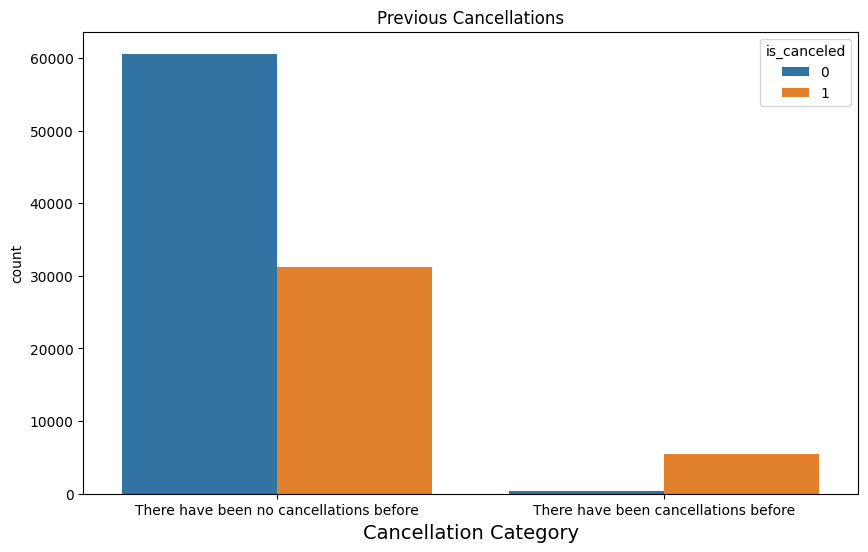

In [61]:
# Create a new category for two segments: “No previous cancelations” and ”Previous cancellations”
def cancellation_segment_two(x):
    if x == 0:
        return 'There have been no cancellations before'
    else:
        return 'There have been cancellations before'

# Apply the function to create a new column with two segments
canceled_before = data.loc[:, ['previous_cancellations', 'is_canceled']]
canceled_before['cancellation_segments'] = canceled_before['previous_cancellations'].apply(cancellation_segment_two)

# Visualize a graph with two segments
plt.figure(figsize=(10, 6))
sns.countplot(x='cancellation_segments', hue='is_canceled', data=canceled_before)
plt.xlabel('Cancellation Category', fontsize=14)
plt.title('Previous Cancellations')
plt.show()


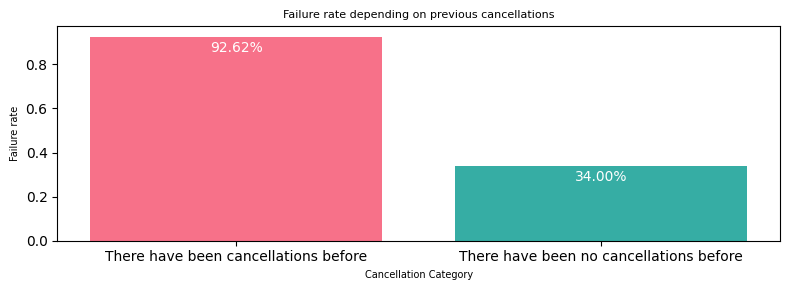

In [62]:
# Create two categories: “Has been canceled before” and “Has not been canceled before”.
# prev_cancel = data.loc[:, ['previous_cancellations', 'is_canceled']] 

# prev_cancel['previous_cancellations_category'] = prev_cancel['previous_cancellations'].apply(lambda x: 'Не было отмен ранее' if x == 0 else 'Были отмены ранее')

# Calculate the bounce rate for each category
canceled_before_category_cancellation = canceled_before.groupby('cancellation_segments')['is_canceled'].mean()

# Build a bar chart for the categories “Previously canceled” and “Not canceled before”
plt.figure(figsize=(8, 3))
colors = sns.color_palette("husl", len(canceled_before_category_cancellation))

# Let's build a bar graph
bars = plt.bar(x=canceled_before_category_cancellation.index, height=canceled_before_category_cancellation.values, color=colors)

# Add captions and a header
plt.title('Failure rate depending on previous cancellations', fontsize=8)
plt.xlabel('Cancellation Category', fontsize=7)
plt.ylabel('Failure rate', fontsize=7)

# Show values on columns within each column
for i, value in enumerate(canceled_before_category_cancellation.values):
    plt.text(i, value - 0.02, f'{value:.2%}', ha='center', va='top', fontsize=10, color='white')  # captions inside the columns

# Apply tight_layout to display correctly
plt.tight_layout()

# Display the graph
plt.show()

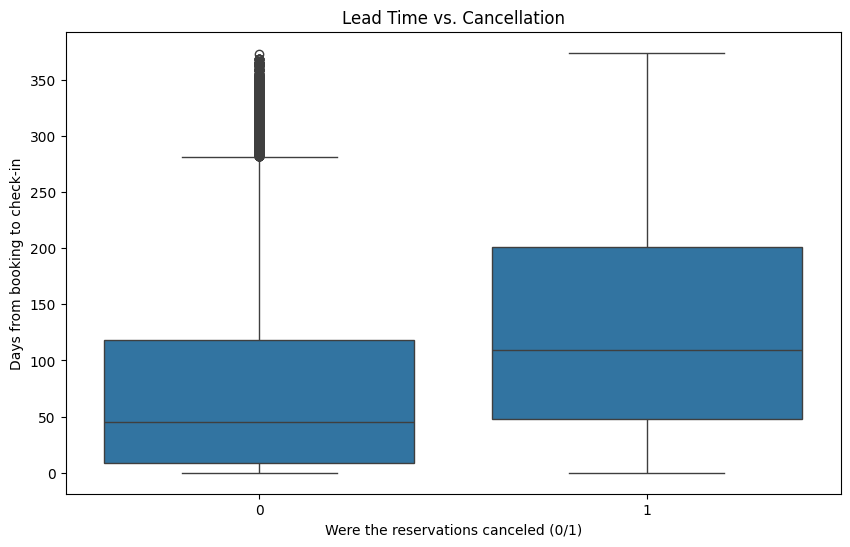

In [63]:
# Visualization of lead_time distribution depending on booking cancellation
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='is_canceled', y='lead_time', data=data)

# Set axis and chart names
ax.set_title('Lead Time vs. Cancellation')
ax.set_xlabel('Were the reservations canceled (0/1)')
ax.set_ylabel('Days from booking to check-in')


plt.show()

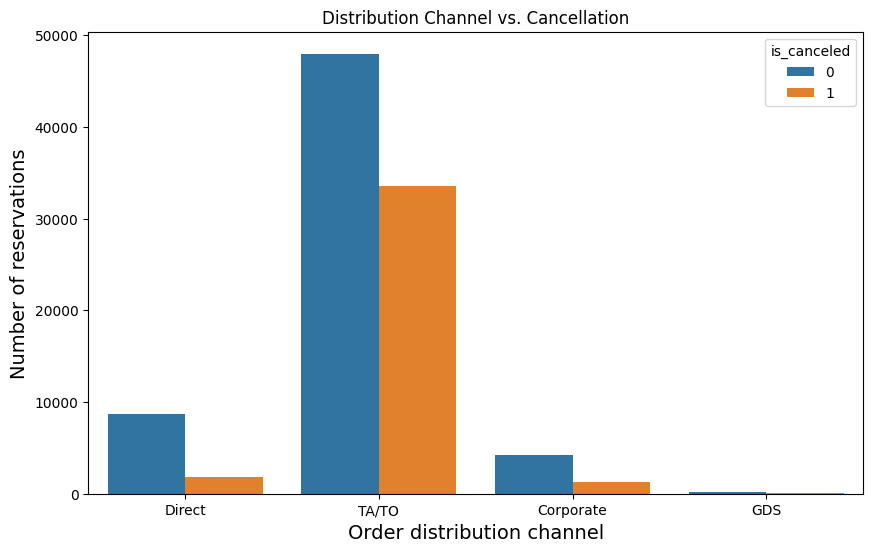

In [64]:
# Visualization of cancellation distribution by booking channel
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', hue='is_canceled', data=data)
plt.title('Distribution Channel vs. Cancellation')
plt.ylabel('Number of reservations', fontsize=14)
plt.xlabel('Order distribution channel', fontsize=14)

plt.show()

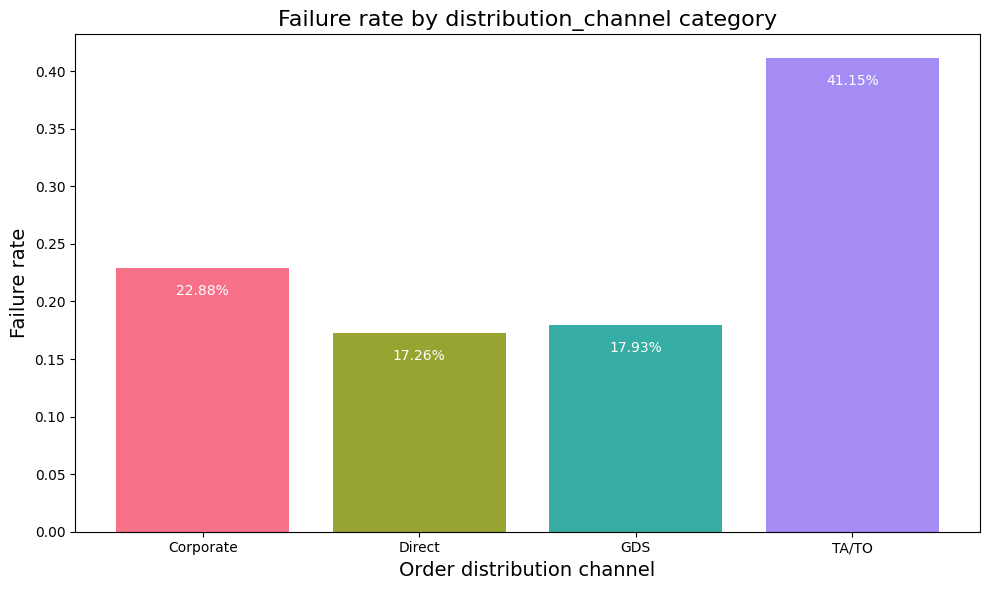

In [65]:
#Calculate the bounce rate for each category distribution_channel
distribution_channel_cancellation = data.groupby('distribution_channel')['is_canceled'].mean()

#Build a bar chart for distribution_channel categories
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(distribution_channel_cancellation))

#Let's build a bar graph
bars = plt.bar(x=distribution_channel_cancellation.index, height=distribution_channel_cancellation.values, color=colors)

#Add captions and a header
plt.title('Failure rate by distribution_channel category', fontsize=16)
plt.xlabel('Order distribution channel', fontsize=14)
plt.ylabel('Failure rate', fontsize=14)

#Show values on columns within each column
for i, value in enumerate(distribution_channel_cancellation.values):
    plt.text(i, value - 0.02, f'{value:.2%}', ha='center', va='center', fontsize=10, color='white') # captions inside the columns

#Apply tight_layout to display correctly
plt.tight_layout()

#Display the graph
plt.show()


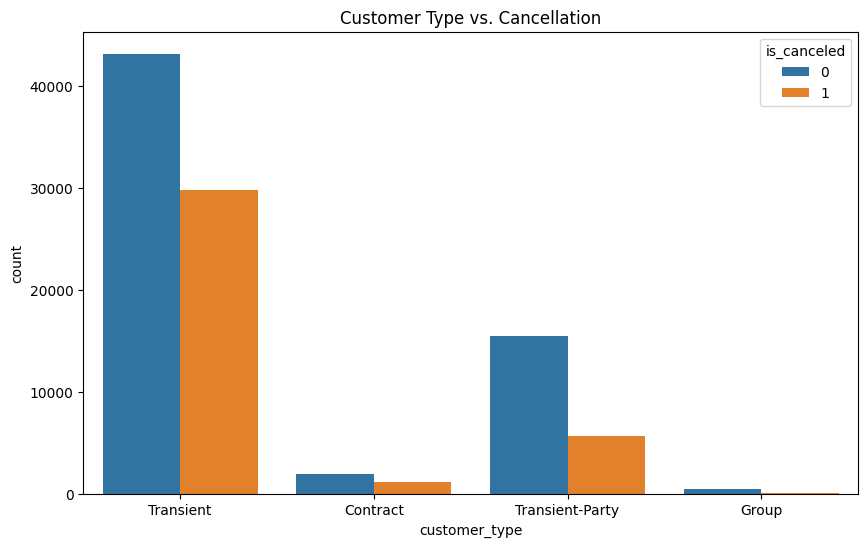

In [66]:
#Visualization of cancellations by customer type
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=data)
plt.title('Customer Type vs. Cancellation')
plt.show()

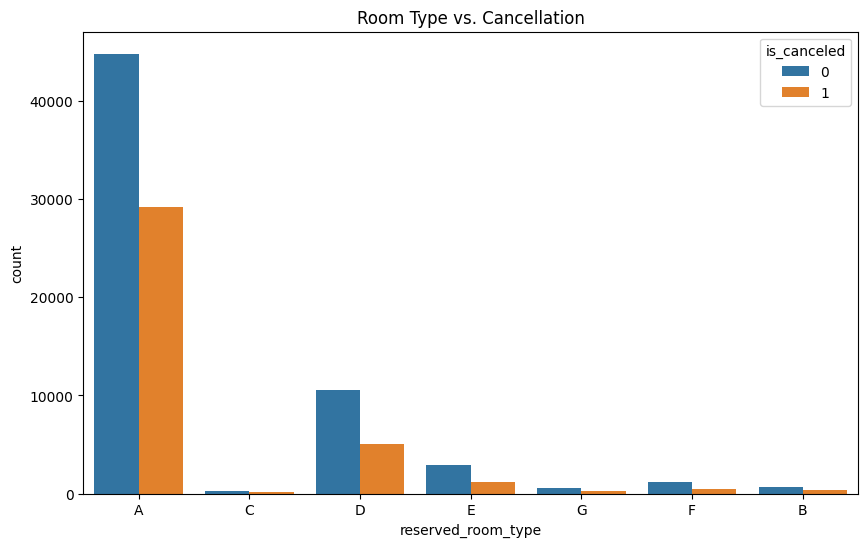

In [67]:
#Cancel visualization by number type
plt.figure(figsize=(10, 6))
sns.countplot(x='reserved_room_type', hue='is_canceled', data=data)
plt.title('Room Type vs. Cancellation')
plt.show()

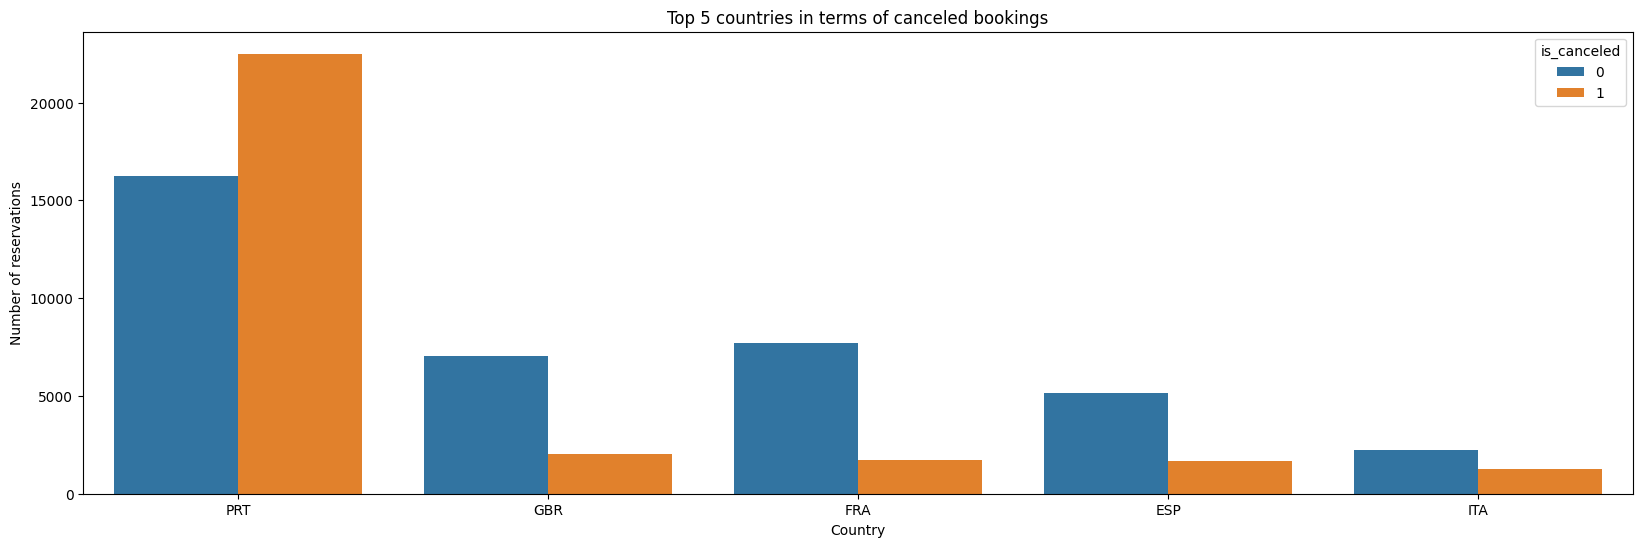

In [68]:
#Getting the top 5 countries by number of bookings canceled
top_5_countries = data[data['is_canceled'] == 1]['country'].value_counts().nlargest(5).index

#Filtering data by top 5 countries only
filtered_data = data[data['country'].isin(top_5_countries)]

#Chart visualization for top 5 countries with cancellations
plt.figure(figsize=(20, 6))
sns.countplot(x='country', hue='is_canceled', data=filtered_data, order=top_5_countries)
plt.title('Top 5 countries in terms of canceled bookings')
plt.xlabel('Country')
plt.ylabel('Number of reservations')
plt.show()

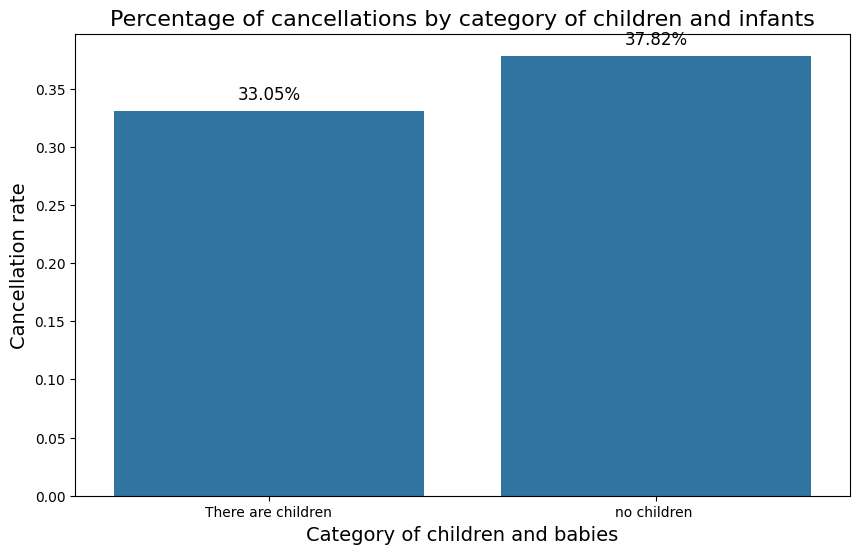

In [69]:
data_children_df = data.loc[:, ['is_canceled', 'babies', 'children']]
#Let's put babies and children in the same category

data_children_df['total_children_and_babies'] = data_children_df['children'] + data_children_df['babies']

#Function for dividing into three categories
def categorize_children_babies(row):
    if row == 0:
        return 'no children '
    else:
        return 'There are children'

#Add a new category to the dataframe
data_children_df['children_babies_category'] = data_children_df['total_children_and_babies'].apply(categorize_children_babies)

#Calculate the cancellation rate for each category
children_babies_cancellation = data_children_df.groupby('children_babies_category')['is_canceled'].mean()

#Let's make a graph
plt.figure(figsize=(10, 6))
sns.barplot(x=children_babies_cancellation.index, y=children_babies_cancellation.values)

#Add captions and a header
plt.title('Percentage of cancellations by category of children and infants', fontsize=16)
plt.xlabel('Category of children and babies', fontsize=14)
plt.ylabel('Cancellation rate', fontsize=14)

#Show values on columns
for i, value in enumerate(children_babies_cancellation.values):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', fontsize=12)

#Display the graph
plt.show()


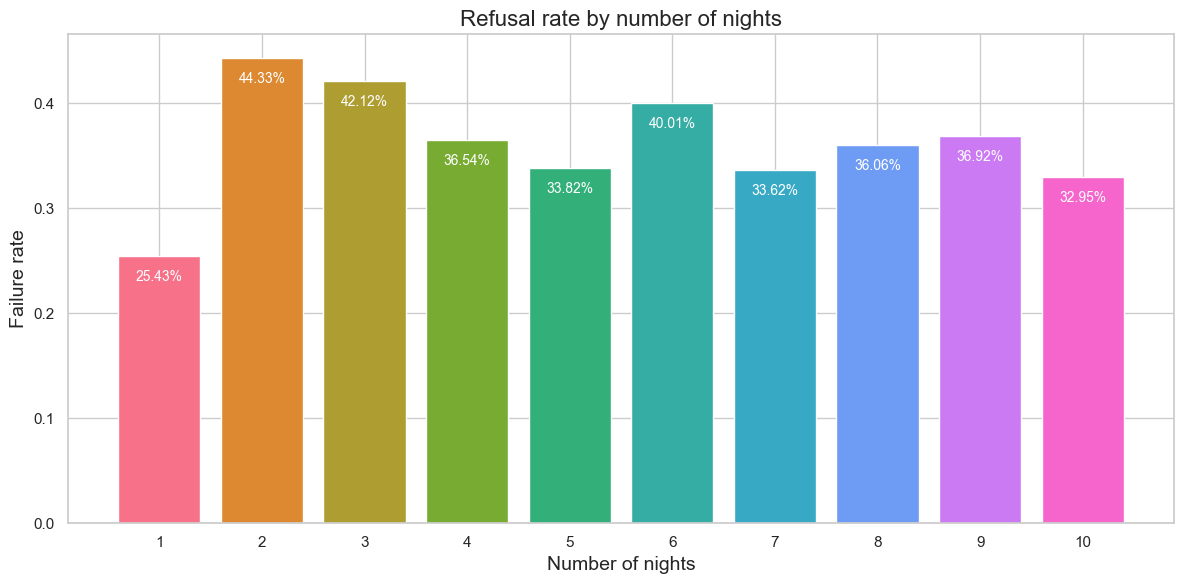

In [70]:
#Calculate the percentage of cancellations for all unique values of total_nights (from 1 to 10)
nights_cancellation = data.groupby('total_nights')['is_canceled'].mean().loc[1:10]

#Adjust the style and color palette
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#Use the color palette for the multicolored bars, defining a color for each index
colors = sns.color_palette("husl", len(nights_cancellation))

#Let's build a bar graph
bars = plt.bar(x=nights_cancellation.index, height=nights_cancellation.values, color=colors)

#Add captions and a header
plt.title('Refusal rate by number of nights', fontsize=16)
plt.xlabel('Number of nights', fontsize=14)
plt.ylabel('Failure rate', fontsize=14)

#Show values on columns within each column
for i, (x, value) in enumerate(zip(nights_cancellation.index, nights_cancellation.values)):
    plt.text(x, value - 0.02, f'{value:.2%}', ha='center', va='center', fontsize=10, color='white')  # inside the columns

#Correct the indents and neatly position the X-axis
plt.xticks(ticks=nights_cancellation.index, labels=nights_cancellation.index)

#Apply tight_layout to display correctly
plt.tight_layout()

#Display the graph
plt.show()


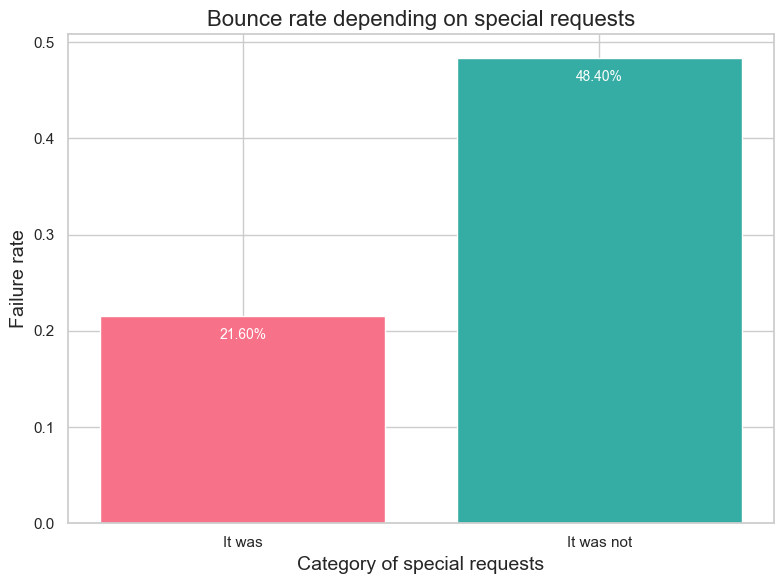

In [71]:
#Create two categories: “There were special requests” and “No special requests”.
data['special_requests_category'] = data['total_of_special_requests'].apply(lambda x: 'It was not' if x == 0 else 'It was')

#Calculate the bounce rate for each category
special_requests_category_cancellation = data.groupby('special_requests_category')['is_canceled'].mean()

#Build a bar chart for the categories “There were special requests” and “There were no special requests”
plt.figure(figsize=(8, 6))
colors = sns.color_palette("husl", len(special_requests_category_cancellation))

#Let's build a bar graph
bars = plt.bar(x=special_requests_category_cancellation.index, height=special_requests_category_cancellation.values, color=colors)

#Add captions and a header
plt.title('Bounce rate depending on special requests', fontsize=16)
plt.xlabel('Category of special requests', fontsize=14)
plt.ylabel('Failure rate', fontsize=14)

#Show values on columns within each column
for i, value in enumerate(special_requests_category_cancellation.values):
    plt.text(i, value - 0.02, f'{value:.2%}', ha='center', va='center', fontsize=10, color='white')   # inside the columns

#Apply tight_layout to display correctly
plt.tight_layout()

#Display the graph
plt.show()


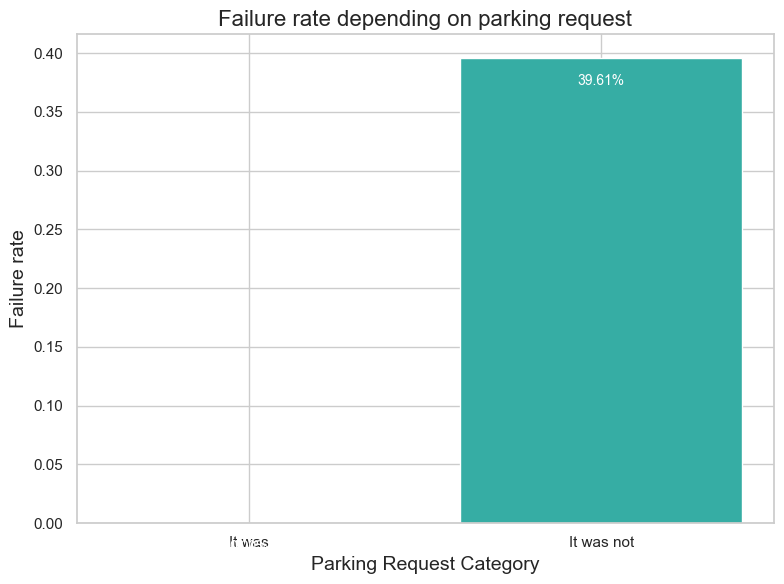

In [72]:
#Create two categories: “There was a parking request” and “There was no parking request”.

parking_df = data.loc[:, ['required_car_parking_spaces', 'is_canceled']]
parking_df['parking_request_category'] = parking_df['required_car_parking_spaces'].apply(lambda x: 'It was not' if x == 0 else 'It was')

#Calculate the bounce rate for each category
parking_request_category_cancellation = parking_df.groupby('parking_request_category')['is_canceled'].mean()

#Build a bar chart for the categories “There was a parking request” and “There was not”
plt.figure(figsize=(8, 6))
colors = sns.color_palette("husl", len(parking_request_category_cancellation))

#Let's build a bar graph
bars = plt.bar(x=parking_request_category_cancellation.index, height=parking_request_category_cancellation.values, color=colors)

#Add captions and a header
plt.title('Failure rate depending on parking request', fontsize=16)
plt.xlabel('Parking Request Category', fontsize=14)
plt.ylabel('Failure rate', fontsize=14)

#Show values on columns within each column
for i, value in enumerate(parking_request_category_cancellation.values):
    plt.text(i, value - 0.02, f'{value:.2%}', ha='center', va='center', fontsize=10, color='white') # inside the columns

#Apply tight_layout to display correctly
plt.tight_layout()

#Display the graph
plt.show()

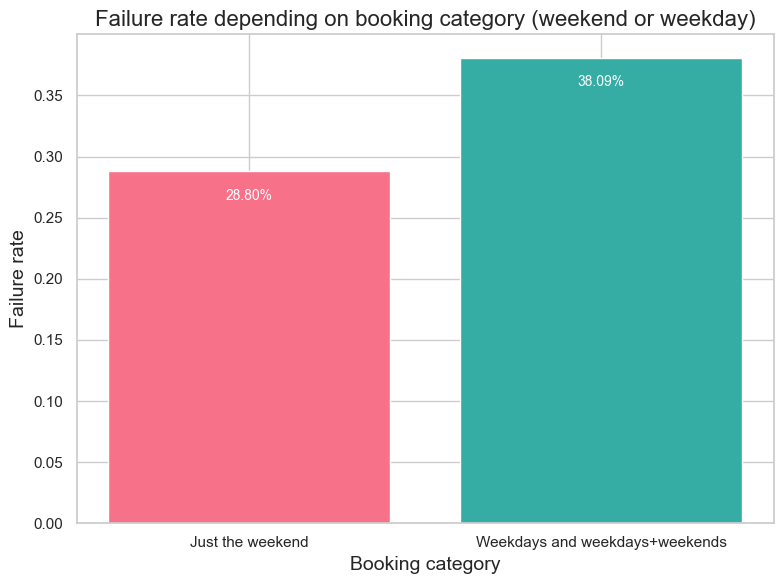

In [73]:
#Create two categories: “Weekend Only” and “Weekdays and Weekdays+Weekends”
days_df = data.loc[:, ['is_canceled', 'stays_in_week_nights', 'stays_in_weekend_nights']]
days_df['weekend_booking_category'] = data.apply(
    lambda row: 'Just the weekend' if row['stays_in_week_nights'] == 0 else 'Weekdays and weekdays+weekends', axis=1)

#Calculate the bounce rate for each category
weekend_booking_category_cancellation = days_df.groupby('weekend_booking_category')['is_canceled'].mean()

#Build a bar chart for “Weekend Only” and “Weekdays and Weekdays+Weekends” categories
plt.figure(figsize=(8, 6))
colors = sns.color_palette("husl", len(weekend_booking_category_cancellation))

#Let's build a bar graph
bars = plt.bar(x=weekend_booking_category_cancellation.index, height=weekend_booking_category_cancellation.values, color=colors)

#Add captions and a header
plt.title('Failure rate depending on booking category (weekend or weekday)', fontsize=16)
plt.xlabel('Booking category', fontsize=14)
plt.ylabel('Failure rate', fontsize=14)

#Show values on columns within each column
for i, value in enumerate(weekend_booking_category_cancellation.values):
    plt.text(i, value - 0.02, f'{value:.2%}', ha='center', va='center', fontsize=10, color='white')  # captions inside the columns

#Apply tight_layout to display correctly
plt.tight_layout()

#Display the graph
plt.show()


# Describing the profile of an «unreliable» customer

**If there have been cancellations before:**
* Customers who have previously canceled reservations have a significantly higher chance of canceling again. This is confirmed by analyzing the categories of previous cancellations.

**More than 100 days prior to the arrival date:**
* Customers with longer time to arrival, especially those who book more than 100 days in advance, do have a higher propensity to cancel. This is confirmed by the visualization of the booking time (lead_time).

**Distribution channel TA/TO:** 
**Bookings made through travel agencies and tour operators (TA/TO) have a significantly higher cancellation rate compared to other channels such as direct or corporate bookings.

**Customer Type - Transient:**
* Individual customers (Transient) who book for short-term travel have a higher rate of cancellations compared to group or contract customers.

**Category A room booked:**
*The most expensive rooms (Category A) may be canceled more often, possibly due to the high cost, making the customer less certain of their plans.

**Citizenship - Portugal:** 
* The analysis shows that customers from Portugal are more likely to cancel bookings. This may be due to cultural or economic factors.

**No special requests when making a reservation:** 
*Customers who do not request extras (such as meals or other options) may be less interested in the reservation and therefore more likely to cancel.

**Did not request parking for the car:**
* Customers who do not request a parking space are more likely to cancel reservations. This may be due to the fact that they may not be planning a carpool trip, making their plans less concrete.

**Books on weekdays** 
* Customers who book on weekdays are more likely to cancel reservations than those who book on weekends or weekends plus weekdays. This may be due to less stable weekday plans, the possibility of business travel changes, or other circumstances.

## Bottom line, brief summary: 

1. If there have been prior cancelations.
2. more than 100 days prior to the arrival date.
3. Distribution channel TA/TO.
4. Customer type is Transient.
5. Category A room has been booked.
6. Nationality - Portugal.
7. Does not leave special requests when booking.
8. Did not request parking for the car.
9. Makes reservations for weekdays.

### Final Project Report

### 1. Preliminary data cleaning and preparation
- A thorough cleaning of the data was performed, including removing omissions, extra spaces in strings, and bringing the data types to the required formats.
- Pre-processing of the data was performed.

### 2. Digitization of categorical columns
- In order for machine learning models to work correctly, categorical columns were digitized using **One-Hot Encoding** and **Frequency Encoding** methods. This allowed the different categories in the model to be taken into account and used for predictions.

### 3. Testing machine learning models
- Two models were tested: **Logistic Regression** and **Random Forest**.
- Hyperparameter fitting experiments were conducted for both models.
- The **Metrics** (Recall, Precision, F1-Score) were tested on both validation and test datasets.
- As a result, the **Random Forest** model performed best, showing higher performance on all key metrics.


### 4. Optimization of business metrics using the model
- Based on the trained model, the process of implementing a deposit system to reduce the number of booking cancelations was simulated.
- The business model took into account:
  - A 50% reduction in the number of cancellations due to deposits.
  - Losses from customers who canceled reservations due to the deposit requirement.
- After implementing the model, it was calculated that the hotel could generate additional revenue of more than **13 million rubles**, which confirms the effectiveness of the algorithm.

### 5. Exploratory data analysis and identification of “unreliable customers”
- Conducted a detailed exploratory data analysis (EDA) to identify the factors that influence the likelihood of a reservation being canceled.
- Graphs were constructed to illustrate the relationship of cancellations with various attributes.
- Based on the analysis, a portrait of the “unreliable customer” most likely to cancel a booking was developed:
  1. The customer has had cancelations before.
  2. Booked more than 100 days before the arrival date.
  3. Booked through the **TA/TO** channel.
  4. Customer is categorized as a **Transient**.
  5. Booked a room in the **A** category.
  6. The client's nationality is **Portugal**.
  7. The client does not leave any special requests or parking reservations.
  8. The client makes reservations for weekdays.

### Conclusion
- The project resulted in the development and testing of a machine learning model that can be successfully implemented to reduce the number of booking cancellations.
- Exploratory analysis of the data allowed to identify the main factors influencing cancellations and create a profile of an “unreliable” customer, which can be useful for further work of the hotel with the target audience.
- The projected benefit from using the model and deposit system is more than **13 million rubles**, which confirms the feasibility of implementing the proposed system.